# Manufacturing Threshold Modeling

## Abstract

This analysis documents my analysis of the SOC range implications of assuming a VHA threshold equal to 1.2146. The concern was that the SOC range will be excessive (>10%). I am using a Monte Carlo analysis here to estimate the actual SOC range based on the sampling the empirical distribution of the HPM10 ratio error.



In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

## Read in SOC Curve

This SOC curve assumes a minimum operating voltage for the Z22A based on the wireless circuit.

In [99]:

dfSOC=pd.read_csv("Z22A.csv",sep="\t")
display(dfSOC)
dfSOC['SOC'] = dfSOC['SOC'].str.rstrip('%').astype('float') / 100.0
SOCZ22A = scipy.interpolate.interp1d(dfSOC.VBAT, dfSOC.SOC)

,SOC,VBAT
0,0%,3.41690
1,1%,3.49047
2,2%,3.54508
3,3%,3.58806
4,4%,3.62151
...,...,...
96,96%,4.12662
97,97%,4.13602
98,98%,4.14602
99,99%,4.15770


## Read in the Empirical Ratio Distribution

Here is a sample fo 6103 ratios measured by production.

In [100]:
df = pd.read_csv("RawRatio.csv")
display(df)

,Ratio
0,0.327312
1,0.328617
2,0.329617
3,0.331623
4,0.331720
...,...
6098,0.332991
6099,0.332991
6100,0.332991
6101,0.333009


Minimum ratio is 0.327312
Maximum ratio is 0.333018
Range is 0.005706


array([[<AxesSubplot:title={'center':'Ratio'}>]], dtype=object)

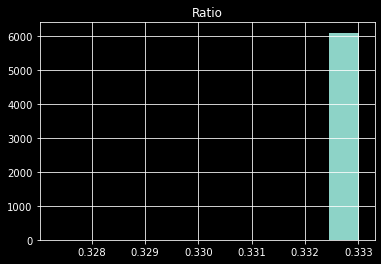

In [101]:
print(f'Minimum ratio is {df.Ratio.min():.6f}')
print(f'Maximum ratio is {df.Ratio.max():.6f}')
print(f'Range is {df.Ratio.max()-df.Ratio.min():.6f}')
plt.style.use("dark_background")
df.hist(bins=10)

Text(0, 0.5, 'Number of Units')

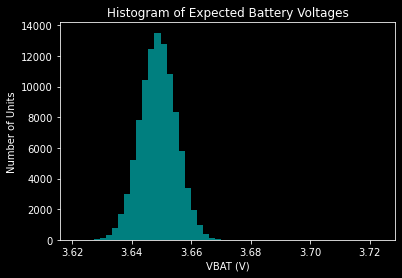

In [102]:
ratio=df.Ratio.sample(100_000, replace=True)
lsad=np.random.normal(loc=0,scale=0.002,size=100_000)
VHA=1.2146
vbat = (VHA+lsad)/ratio
plt.hist(vbat.values, color='cyan', alpha=0.5,bins=50)
plt.title("Histogram of Expected Battery Voltages")
plt.xlabel("VBAT (V)")
plt.ylabel("Number of Units")

In [103]:
vTLow=np.quantile(vbat, q=0.001)
vTHigh=np.quantile(vbat,q=0.999)
print(f'Assume we set a VHA side threshold of {VHA:.6f}V.')
print(f'This VHA will map to a battery voltage range of {vTLow:.6f}V to {vTHigh:.6f}V.')
print(f'These battery voltage represent a SOC range of {SOCZ22A(vTLow):.1%} to {SOCZ22A(vTHigh):.1%}.')


Assume we set a VHA side threshold of 1.214600V.
This VHA will map to a battery voltage range of 3.630230V to 3.669003V.
These battery voltage represent a SOC range of 4.3% to 6.6%.


## Same Analysis for Accu60

The threshold is not even close to 20% for a Varta battery.

In [104]:
dfSOC=pd.read_csv("Accu60.csv",sep="\t")
display(dfSOC)
dfSOC['SOC'] = dfSOC['SOC'].str.rstrip('%').astype('float') / 100.0
SOC60 = scipy.interpolate.interp1d(dfSOC.VBAT, dfSOC.SOC)

,SOC,VBAT
0,0%,3.42698
1,1%,3.43402
2,2%,3.44186
3,3%,3.45027
4,4%,3.45902
...,...,...
96,96%,4.11783
97,97%,4.13218
98,98%,4.15133
99,99%,4.17532


In [105]:
print(f'Assume we set a VHA side threshold of {VHA:.6f}V.')
print(f'This VHA will map to a battery voltage range of {vTLow:.6f}V to {vTHigh:.6f}V.')
print(f'These battery voltage represent a SOC range of {SOC60(vTLow):.1%} to {SOC60(vTHigh):.1%}.')

Assume we set a VHA side threshold of 1.214600V.
This VHA will map to a battery voltage range of 3.630230V to 3.669003V.
These battery voltage represent a SOC range of 40.8% to 48.5%.
